### importing all the libraries

In [7]:
import os
import random as rd
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras_tuner
from sklearn.metrics import accuracy_score
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling3D,Flatten,Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping as ES
from pickle import dump

### accssing the paths of images with help of globe library

In [60]:
Bacterial_spot = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Bacterial_spot/*.*")
Early_blight = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Early_blight/*.*")
healthy = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___healthy/*.*")
Late_blight = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Late_blight/*.*")
Leaf_Mold = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Leaf_Mold/*.*")
Septoria_leaf_spot = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Septoria_leaf_spot/*.*")
Spider_mites = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Spider_mites/*.*")
Target_Spot = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Target_Spot/*.*")
Tomato_mosaic_virus = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Tomato_mosaic_virus/*.*")
Tomato_Yellow_Leaf_Curl_Virus = glob.glob(r"C:\Users\HP\Desktop\tomato\train\Tomato___Tomato_Yellow_Leaf_Curl_Virus/*.*")

### checking the length of each class

In [61]:
print(len(Bacterial_spot))
print(len(Early_blight))
print(len(healthy))
print(len(Late_blight))
print(len(Leaf_Mold))
print(len(Septoria_leaf_spot))
print(len(Spider_mites))
print(len(Target_Spot))
print(len(Tomato_mosaic_virus))
print(len(Tomato_Yellow_Leaf_Curl_Virus))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


### cross checking the data

In [62]:
Bacterial_spot[0]

'C:\\Users\\HP\\Desktop\\tomato\\train\\Tomato___Bacterial_spot\\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'

In [63]:
img = cv2.imread(Bacterial_spot[0])
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
img.shape

(256, 256, 3)

* this is the shape of our images

In [65]:
a1 = [Bacterial_spot[0],Early_blight[0],healthy[0],Late_blight[0],Leaf_Mold[0],Septoria_leaf_spot[0],Spider_mites[0],Target_Spot[0],Tomato_mosaic_virus[0],Tomato_Yellow_Leaf_Curl_Virus[0]]

In [66]:
len(a1)

10

### visualizing the types of diseases for leafs

Text(0.5, 1.0, 'Tomato_Yellow_Leaf_Curl_Virus')

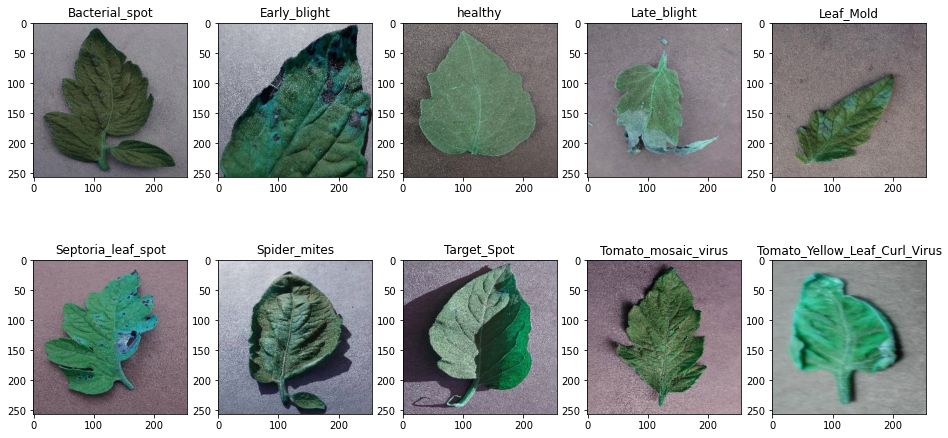

In [67]:
fig = plt.figure(figsize=(16, 8))
rows = 2
columns = 5
i1 = cv2.imread(a1[0])
i2 = cv2.imread(a1[1])
i3 = cv2.imread(a1[2])
i4 = cv2.imread(a1[3])
i5 = cv2.imread(a1[4])
i6 = cv2.imread(a1[5])
i7 = cv2.imread(a1[6])
i8 = cv2.imread(a1[7])
i9 = cv2.imread(a1[8])
i10 = cv2.imread(a1[9])
fig.add_subplot(rows, columns, 1)
plt.imshow(i1)
#plt.axis('off')
plt.title("Bacterial_spot")
fig.add_subplot(rows, columns, 2)
plt.imshow(i2)
#plt.axis('off')
plt.title("Early_blight")
fig.add_subplot(rows, columns, 3)
plt.imshow(i3)
#plt.axis('off')
plt.title("healthy")
fig.add_subplot(rows, columns, 4)
plt.imshow(i4)
#plt.axis('off')
plt.title("Late_blight")
fig.add_subplot(rows, columns, 5)
plt.imshow(i5)
#plt.axis('off')
plt.title("Leaf_Mold")
fig.add_subplot(rows, columns, 6)
plt.imshow(i6)
#plt.axis('off')
plt.title("Septoria_leaf_spot")
fig.add_subplot(rows, columns, 7)
plt.imshow(i7)
#plt.axis('off')
plt.title("Spider_mites")
fig.add_subplot(rows, columns, 8)
plt.imshow(i8)
#plt.axis('off')
plt.title("Target_Spot")
fig.add_subplot(rows, columns, 9)
plt.imshow(i9)
#plt.axis('off')
plt.title("Tomato_mosaic_virus")
fig.add_subplot(rows, columns, 10)
plt.imshow(i10)
#plt.axis('off')
plt.title("Tomato_Yellow_Leaf_Curl_Virus")

### reading and saving the image data in 'array format with labels'

In [68]:
data = []
labels = []

for i in Bacterial_spot:
    img = cv2.imread(i)
    img = cv2.resize(img, (100,100))
    data.append(img)
    labels.append(0)
    
for j in Early_blight:
    img1 = cv2.imread(j)
    img1 = cv2.resize(img1, (100,100))
    data.append(img1)
    labels.append(1)

for k in healthy:
    img2 = cv2.imread(k)
    img2 = cv2.resize(img2, (100,100))
    data.append(img2)
    labels.append(2)
    
for l in Late_blight:
    img3 = cv2.imread(l)
    img3 = cv2.resize(img3, (100,100))
    data.append(img3)
    labels.append(3)

for m in Leaf_Mold:
    img4 = cv2.imread(m)
    img4 = cv2.resize(img4, (100,100))
    data.append(img4)
    labels.append(4)
    
for n in Septoria_leaf_spot:
    img5 = cv2.imread(n)
    img5 = cv2.resize(img5, (100,100))
    data.append(img5)
    labels.append(5)

for p in Spider_mites:
    img6 = cv2.imread(p)
    img6 = cv2.resize(img6, (100,100))
    data.append(img6)
    labels.append(6)
    
for a in Target_Spot:
    img7 = cv2.imread(a)
    img7 = cv2.resize(img7, (100,100))
    data.append(img7)
    labels.append(7)

for b in Tomato_mosaic_virus:
    img8 = cv2.imread(b)
    img8 = cv2.resize(img8, (100,100))
    data.append(img8)
    labels.append(8)
    
for d in Tomato_Yellow_Leaf_Curl_Virus:
    img9 = cv2.imread(d)
    img9 = cv2.resize(img9, (100,100))
    data.append(img9)
    labels.append(9)

* We have resizing the images to reduce the computation time and space complexity

In [69]:
data[0]

array([[[146, 146, 152],
        [149, 149, 155],
        [148, 148, 154],
        ...,
        [152, 150, 156],
        [154, 152, 158],
        [154, 152, 158]],

       [[148, 148, 154],
        [144, 144, 150],
        [147, 147, 153],
        ...,
        [150, 148, 154],
        [150, 148, 154],
        [150, 148, 154]],

       [[146, 146, 152],
        [142, 142, 148],
        [144, 144, 150],
        ...,
        [153, 151, 157],
        [156, 154, 160],
        [149, 147, 153]],

       ...,

       [[104, 103, 113],
        [107, 106, 116],
        [116, 115, 125],
        ...,
        [115, 113, 119],
        [111, 109, 114],
        [107, 105, 111]],

       [[109, 108, 118],
        [106, 105, 115],
        [108, 106, 117],
        ...,
        [109, 107, 113],
        [115, 113, 119],
        [108, 106, 112]],

       [[109, 108, 118],
        [111, 110, 120],
        [103, 102, 112],
        ...,
        [113, 111, 117],
        [115, 113, 119],
        [115, 114, 120]]

* after reading and resizing the data from original final data is looks like....

In [70]:
data[0].shape

(100, 100, 3)

### to cross check the image with labels

In [71]:
cv2.imshow("img",data[4100])
cv2.waitKey(0)
cv2.destroyAllWindows()
print(labels[4100])

4


In [72]:
labels[4100]

4

### splitting the dataset into d_train, d_test

In [73]:
x_train,x_test,y_train,y_test = train_test_split(np.array(data),np.array(labels),test_size=0.3)

In [74]:
x_train.shape

(7000, 100, 100, 3)

In [75]:
y_train.shape

(7000,)

### applying class separtion on class labels (like one hot encoding)

In [76]:
import keras.utils
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [77]:
y_trainf = keras.utils.to_categorical(y_train,dtype='int')
y_testf = keras.utils.to_categorical(y_test,dtype='int')

In [78]:
x_trains = x_train/255
x_tests = x_test/255

* successfully Normalized the data

In [79]:
y_trainf.shape

(7000, 10)

* after applying utiles method on class labels the shape of the data is like these

In [80]:
y_trainf[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
y_testf.shape

(3000, 10)

In [82]:
y_testf[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### creating the 'vaneela cnn architechture' (own architechture)

In [83]:
model = Sequential()

# block : 1

model.add(Conv2D(128, (3, 3),input_shape=(100,100,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.25))

# block : 2

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

# block : 3

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# block : 4

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))

# block : 6

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# Dence block : 01

model.add(Flatten())
model.add(Dense(1029))
model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 activation (Activation)     (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 activation_1 (Activation)   (None, 30, 30, 128)       0         
                                                      

### Training The 'Model'

In [84]:
model.compile(optimizer="Adam",metrics=['accuracy'],loss='categorical_crossentropy')

In [85]:
h1 = model.fit(x_trains,y_trainf,batch_size=40,epochs=20,validation_split=0.2)

Epoch 1/20
140/140 [==============================] - 263s 2s/step - loss: 2.0948 - accuracy: 0.1986 - val_loss: 1.6947 - val_accuracy: 0.3921
Epoch 2/20
140/140 [==============================] - 243s 2s/step - loss: 1.5474 - accuracy: 0.4427 - val_loss: 1.3360 - val_accuracy: 0.4979
Epoch 3/20
140/140 [==============================] - 238s 2s/step - loss: 1.2100 - accuracy: 0.5625 - val_loss: 1.0282 - val_accuracy: 0.6250
Epoch 4/20
140/140 [==============================] - 318s 2s/step - loss: 0.9276 - accuracy: 0.6630 - val_loss: 0.7277 - val_accuracy: 0.7393
Epoch 5/20
140/140 [==============================] - 342s 2s/step - loss: 0.7767 - accuracy: 0.7241 - val_loss: 0.7204 - val_accuracy: 0.7500
Epoch 6/20
140/140 [==============================] - 268s 2s/step - loss: 0.6501 - accuracy: 0.7636 - val_loss: 0.6175 - val_accuracy: 0.7707
Epoch 7/20
140/140 [==============================] - 301s 2s/step - loss: 0.6006 - accuracy: 0.7841 - val_loss: 0.5912 - val_accuracy: 0.7821

### testing the 'model' with train data

In [86]:
model.evaluate(x_trains,y_trainf)

219/219 [==============================] - 76s 341ms/step - loss: 0.1635 - accuracy: 0.9516


[0.1635476052761078, 0.9515714049339294]

### testing the 'model' with test dataset

In [87]:
model.evaluate(x_tests,y_testf)

94/94 [==============================] - 33s 349ms/step - loss: 0.4088 - accuracy: 0.8753


[0.40876635909080505, 0.875333309173584]

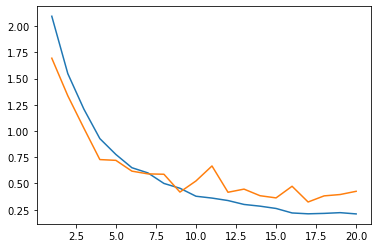

In [88]:
trl = h1.history['loss']
cvl = h1.history['val_loss']
plt.plot(range(1,21),trl,label = 'Training loss')
plt.plot(range(1,21),cvl,label = 'cross_valloss')

* Our model is not getting "Over fitting".

### saving the model

In [91]:
dump(model,open(r'C:\Users\HP\Desktop\tomato\tomato_model_vaneela_model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\activation_3
......vars
...layers\activation_4
......vars
...layers\activation_5
......vars
...layers\activation_6
......vars
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper


### testing the model with unseen data

In [5]:
bsp = r"C:\Users\HP\Desktop\cell_images2\test\Tomato___Bacterial_spot\0afe3bbd-b18b-4c70-8fbd-072844e742a2___GCREC_Bact.Sp 3434.JPG"
#early = r"C:\Users\HP\Pictures\Saved Pictures\images.jpeg"

In [8]:
img = cv2.imread(bsp)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [94]:
data1 = []
label = []
im2 = cv2.imread(r"C:\Users\HP\Desktop\cell_images2\test\Tomato___healthy\01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG")
im2 = cv2.resize(im2, (100,100))
data1.append(im2)
label.append(2)

In [95]:
cv2.imshow("img",data1[0])
cv2.waitKey(0)
cv2.destroyAllWindows()
print(label[0])

2


In [96]:
data1[0].shape

(100, 100, 3)

In [97]:
d = np.array(data1)
c = np.array(label)

In [100]:
np.argmax(model.predict(d))

1/1 [==============================] - 0s 44ms/step


2

#### When We are testing with unseen data it will predicted correctly

# HYERPARAMETER TUNING

In [40]:
def models(ob3):
    model3 = Sequential()
    x=0
    for i in range(ob3.Int("layer",2,10)):
        if x==0:
            model3.add(Conv2D(ob3.Int("filters "+str(x),1,51),kernel_size = ob3.Choice("kernal_size",values=[2,3,5]),activation=ob3.Choice("act",values=["sigmoid","relu","tanh"]),input_shape=(100,100,3)))
        else:
            model3.add(Conv2D(ob3.Int("filters2 "+str(i),1,50),kernel_size = ob3.Choice("kernal_size",values=[2,3,5]),activation=ob3.Choice("act",values=["sigmoid","relu","tanh"])))
        x=x+1
    y=0 
    model3.add(Flatten())
    for j in range(ob3.Int("layers",2,10)):
     
        if y==0:
            model3.add(Dense(ob3.Int("neuron "+str(y),1,50),activation=ob3.Choice("act",values=["sigmoid","relu","tanh"])))
            model3.add(Dropout(ob3.Choice("Droupout",values=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else :
            model3.add(Dense(ob3.Int("neuron "+str(j),1,50),activation=ob3.Choice("act",values=["sigmoid","relu","tanh"])))
        y=y+1
        
    model3.add(Dense(10,activation="softmax"))
    model3.compile(optimizer=ob3.Choice("opt",values=["rmsprop","Adam","adagrad","sgd"]),loss="categorical_crossentropy",metrics=["accuracy"])
    
    return model3

In [41]:
ktt = keras_tuner.RandomSearch(models,objective="val_accuracy",max_trials=5,directory=r"C:\Users\HP\Desktop\xx\1")

In [42]:
ktt.search(x_trains,y_trainf,epochs=6,validation_data=(x_trains,y_trainf))

Trial 5 Complete [01h 28m 33s]
val_accuracy: 0.10114285349845886

Best val_accuracy So Far: 0.19914285838603973
Total elapsed time: 18h 41m 49s
INFO:tensorflow:Oracle triggered exit


In [49]:
ktt.get_best_hyperparameters()[0].values  #callbacks=[ES(monitor="val_loss", patience=5)]

{'layer': 7,
 'filters 0': 8,
 'kernal_size': 2,
 'act': 'tanh',
 'filters2 1': 2,
 'layers': 4,
 'neuron 0': 48,
 'Droupout': 0.6,
 'neuron 1': 23,
 'opt': 'adagrad',
 'filters2 2': 5,
 'filters2 3': 8,
 'filters2 4': 42,
 'filters2 5': 41,
 'filters2 6': 15,
 'filters2 7': 6,
 'filters2 8': 15,
 'filters2 9': 13,
 'neuron 2': 1,
 'neuron 3': 1}

### finding the best model from all models

In [50]:
m=ktt.get_best_models(num_models=1)[0]

### summary about the selected model

In [51]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 8)         104       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 2)         66        
                                                                 
 conv2d_2 (Conv2D)           (None, 97, 97, 5)         45        
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 8)         168       
                                                                 
 conv2d_4 (Conv2D)           (None, 95, 95, 42)        1386      
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 41)        6929      
                                                                 
 conv2d_6 (Conv2D)           (None, 93, 93, 15)        2

### fitting the model (Traing the model)

In [54]:
h = m.fit(x_trains,y_trainf,batch_size=10,epochs=50,initial_epoch=6,validation_split=0.2,callbacks=[ES(monitor="val_loss", patience=5)])

Epoch 7/50
560/560 [==============================] - 234s 414ms/step - loss: 2.1876 - accuracy: 0.1896 - val_loss: 2.1723 - val_accuracy: 0.1893
Epoch 8/50
560/560 [==============================] - 204s 364ms/step - loss: 2.1801 - accuracy: 0.1930 - val_loss: 2.1701 - val_accuracy: 0.1864
Epoch 9/50
560/560 [==============================] - 219s 392ms/step - loss: 2.1735 - accuracy: 0.1900 - val_loss: 2.1580 - val_accuracy: 0.1886
Epoch 10/50
560/560 [==============================] - 209s 373ms/step - loss: 2.1669 - accuracy: 0.1925 - val_loss: 2.1558 - val_accuracy: 0.1907
Epoch 11/50
560/560 [==============================] - 222s 397ms/step - loss: 2.1626 - accuracy: 0.1955 - val_loss: 2.1535 - val_accuracy: 0.1879
Epoch 12/50
560/560 [==============================] - 203s 362ms/step - loss: 2.1576 - accuracy: 0.1955 - val_loss: 2.1493 - val_accuracy: 0.1907
Epoch 13/50
560/560 [==============================] - 221s 394ms/step - loss: 2.1521 - accuracy: 0.1975 - val_loss: 2.15

### evaluating the model (Testing the model with Train dataset)

In [55]:
m.evaluate(x_trains,y_trainf)

219/219 [==============================] - 60s 267ms/step - loss: 2.1045 - accuracy: 0.1981


[2.1045050621032715, 0.1981428563594818]

### evaluating the model (Testing the model with Test dataset)

In [56]:
m.evaluate(x_tests,y_testf)

94/94 [==============================] - 27s 282ms/step - loss: 2.1331 - accuracy: 0.2077


[2.1330816745758057, 0.20766666531562805]

* Due to computaion or computers we are not given high number of layers and hi number of kernals(filters), neurons so the model is not able to perform well. It's not giving high accuracy